Menu:
1. Tambah Edge/Path antar Rumah Sakit
2. Tambah Lokasi Rumah Sakit
3. Hapus Edge/Path antar Rumah Sakit
4. Hapus Lokasi Rumah Sakit
5. Cari Jalur Tercepat
6. Keluar


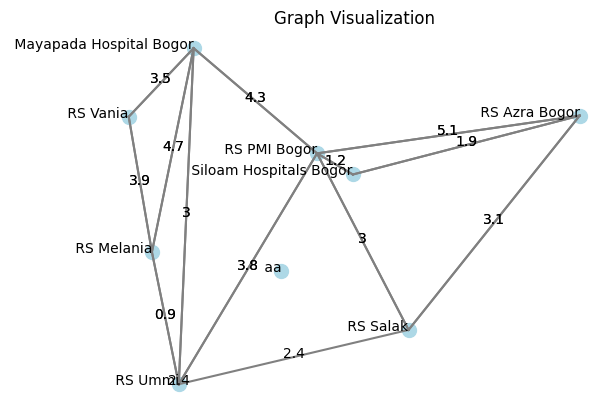


Menu:
1. Tambah Edge/Path antar Rumah Sakit
2. Tambah Lokasi Rumah Sakit
3. Hapus Edge/Path antar Rumah Sakit
4. Hapus Lokasi Rumah Sakit
5. Cari Jalur Tercepat
6. Keluar


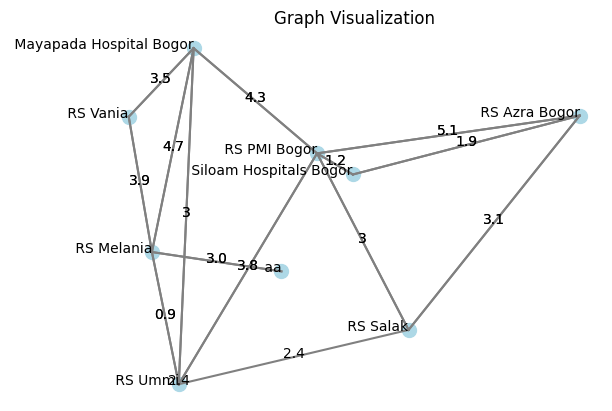


Menu:
1. Tambah Edge/Path antar Rumah Sakit
2. Tambah Lokasi Rumah Sakit
3. Hapus Edge/Path antar Rumah Sakit
4. Hapus Lokasi Rumah Sakit
5. Cari Jalur Tercepat
6. Keluar


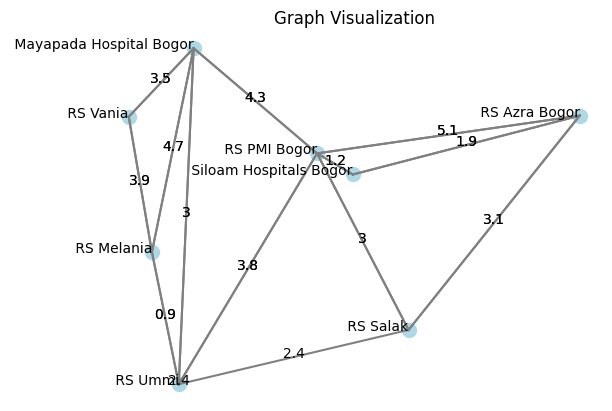


Menu:
1. Tambah Edge/Path antar Rumah Sakit
2. Tambah Lokasi Rumah Sakit
3. Hapus Edge/Path antar Rumah Sakit
4. Hapus Lokasi Rumah Sakit
5. Cari Jalur Tercepat
6. Keluar


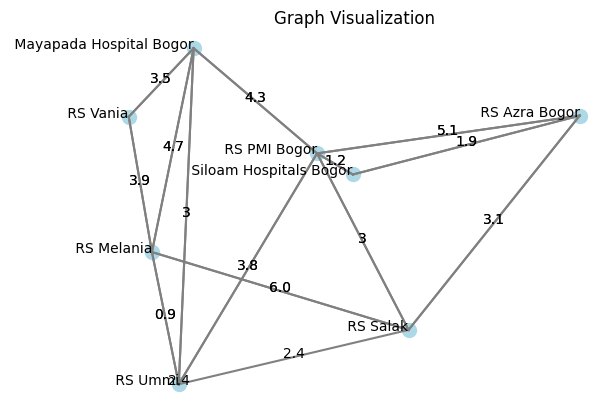


Menu:
1. Tambah Edge/Path antar Rumah Sakit
2. Tambah Lokasi Rumah Sakit
3. Hapus Edge/Path antar Rumah Sakit
4. Hapus Lokasi Rumah Sakit
5. Cari Jalur Tercepat
6. Keluar


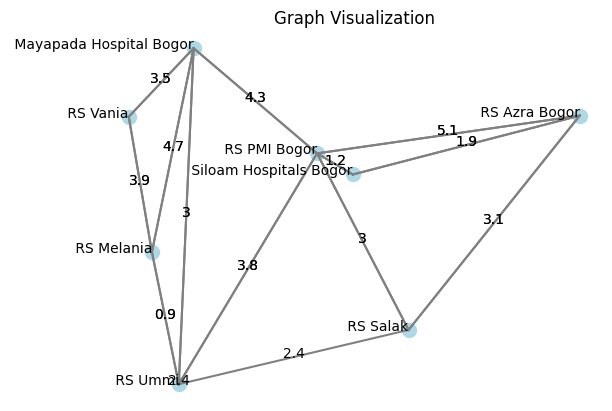


Menu:
1. Tambah Edge/Path antar Rumah Sakit
2. Tambah Lokasi Rumah Sakit
3. Hapus Edge/Path antar Rumah Sakit
4. Hapus Lokasi Rumah Sakit
5. Cari Jalur Tercepat
6. Keluar


In [16]:
import matplotlib.pyplot as plt
import json

def dijkstra(graph, start):
    """
    Applies Dijkstra's algorithm to find the shortest distances and paths from a given start node in a graph.

    Parameters:
    - graph (dict): A dictionary representing the graph where the keys are the nodes and the values are dictionaries
                    representing the neighbors and their corresponding edge weights.
    - start: The starting node for the algorithm.

    Returns:
    - shortest_distances (dict): A dictionary containing the shortest distances from the start node to each node in the graph.
    - previous_nodes (dict): A dictionary containing the previous node in the shortest path for each node in the graph.
    """
    
    shortest_distances = {node: float('infinity') for node in graph}
    shortest_distances[start] = 0
    unvisited_nodes = graph.copy()
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_min_node = min(unvisited_nodes, key=lambda node: shortest_distances[node])
        if shortest_distances[current_min_node] == float('infinity'):
            break

        for neighbor, weight in graph[current_min_node].items():
            tentative_value = shortest_distances[current_min_node] + weight
            if tentative_value < shortest_distances[neighbor]:
                shortest_distances[neighbor] = tentative_value
                previous_nodes[neighbor] = current_min_node

        unvisited_nodes.pop(current_min_node)

    return shortest_distances, previous_nodes

def shortest_path(graph, start, end):
    """
    Finds the shortest path between two nodes in a graph using Dijkstra's algorithm.

    Parameters:
    - graph (dict): A dictionary representing the graph where the keys are nodes and the values are dictionaries of neighboring nodes and their corresponding edge weights.
    - start: The starting node.
    - end: The target node.

    Returns:
    - path (list): A list of nodes representing the shortest path from the start node to the end node.
    - distance (float): The total distance of the shortest path.
    """
    distances, previous_nodes = dijkstra(graph, start)
    path = []
    current_node = end

    while current_node is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]

    path = path[::-1]  # Reversing the path
    return path, distances[end]

def add_edge(graph, node1, node2, weight):
    """
    Adds an edge to the graph.

    Parameters:
    - graph (dict): A dictionary representing the graph where the keys are nodes and the values are dictionaries of neighboring nodes and their corresponding edge weights.
    - node1: The first node.
    - node2: The second node.
    - weight: The weight of the edge between node1 and node2.
    """
    if node1 not in graph:
        graph[node1] = {}
    if node2 not in graph:
        graph[node2] = {}

    graph[node1][node2] = weight
    graph[node2][node1] = weight
    
    # Save to JSON
    with open('graph.json', 'w') as file:
        json.dump(graph, file, indent=4)
        
def add_location(locations, node, x, y):
    """
    Adds a location to the locations dictionary.

    Parameters:
    - locations (dict): A dictionary representing the locations where the keys are the nodes and the values are tuples of x and y coordinates.
    - node: The node to add.
    - x: The x coordinate of the location.
    - y: The y coordinate of the location.
    """
    locations[node] = (x, y)
    
    # Save to JSON
    with open('locations.json', 'w') as file:
        json.dump(locations, file, indent=4)
        
def remove_edge(graph, node1, node2):
    """
    Removes an edge from the graph.

    Parameters:
    - graph (dict): A dictionary representing the graph where the keys are nodes and the values are dictionaries of neighboring nodes and their corresponding edge weights.
    - node1: The first node.
    - node2: The second node.
    """
    if node1 in graph:
        if node2 in graph[node1]:
            del graph[node1][node2]
    if node2 in graph:
        if node1 in graph[node2]:
            del graph[node2][node1]
            
    # Save to JSON
    with open('graph.json', 'w') as file:
        json.dump(graph, file, indent=4)
        
def remove_location(locations, node):
    """
    Removes a location from the locations dictionary.

    Parameters:
    - locations (dict): A dictionary representing the locations where the keys are the nodes and the values are tuples of x and y coordinates.
    - node: The node to remove.
    """
    if node in locations:
        del locations[node]
        
    # Save to JSON
    with open('locations.json', 'w') as file:
        json.dump(locations, file, indent=4)
        
        
# Visualisasi Graph
def visualize_graph(graph, locations):
    """
    Visualizes a graph.

    Parameters:
    - graph (dict): A dictionary representing the graph where the keys are nodes and the values are dictionaries of neighboring nodes and their corresponding edge weights.
    - locations (dict): A dictionary representing the locations where the keys are the nodes and the values are tuples of x and y coordinates.
    """
    plt.figure()

    # Draw nodes
    for node, (x, y) in locations.items():
        plt.scatter(x, y, s=100, c='lightblue')
        plt.text(x, y, f' {node}', fontsize=10, ha='right')

    # Draw edges
    for start, neighbors in graph.items():
        for end, weight in neighbors.items():
            x_start, y_start = locations[start]
            x_end, y_end = locations[end]
            plt.plot([x_start, x_end], [y_start, y_end], 'gray')
            plt.text((x_start + x_end) / 2, (y_start + y_end) / 2, f'{weight}', fontsize=10, ha='center')

    plt.title('Graph Visualization')
    plt.axis('off')
    plt.show()
        
# Visualisasi shortest path
def visualize_shortest_path(graph, shortest_path):
    shortest_path, path_length = shortest_path

    print("\n\n" + "="*100)

    print(f"\n\nJalur tercepat dari {start_node} ke {end_node} adalah melalui node :\n{shortest_path}\ndengan panjang jalur {path_length} Kilometer.\n")

    # Visualisasi graf dan jalur terpendek
    plt.figure()

    # Menggambar node
    for node, (x, y) in locations.items():
        plt.scatter(x, y, s=100, c='lightblue')
        plt.text(x, y, f' {node}', fontsize=10, ha='right')

    # Menggambar edge
    for start, neighbors in graph.items():
        for end, weight in neighbors.items():
            x_start, y_start = locations[start]
            x_end, y_end = locations[end]
            plt.plot([x_start, x_end], [y_start, y_end], 'gray')
            plt.text((x_start + x_end) / 2, (y_start + y_end) / 2, f'{weight}', fontsize=10, ha='center')

    # Menggambar jalur terpendek
    for i in range(len(shortest_path) - 1):
        x_start, y_start = locations[shortest_path[i]]
        x_end, y_end = locations[shortest_path[i + 1]]
        plt.plot([x_start, x_end], [y_start, y_end], 'r', linewidth=4)

    plt.title('Jalur Tercepat Menggunakan Algoritma Dijkstra')
    plt.axis('off')
    plt.show()
        

# Membaca graph dari file JSON
with open('graph.json', 'r') as file:
    graph = json.load(file)


# Lokasi untuk visualisasi (posisi x, y)
with open('locations.json', 'r') as file:
    locations = json.load(file)

while True:
    print("Menu:")
    print("1. Tambah Edge/Path antar Rumah Sakit")
    print("2. Tambah Lokasi Rumah Sakit")
    print("3. Hapus Edge/Path antar Rumah Sakit")
    print("4. Hapus Lokasi Rumah Sakit")
    print("5. Cari Jalur Tercepat")
    print("6. Keluar")
    choice = input("Pilih: ")

    if choice == '1':
        node1 = input("Rumah Sakit 1: ")
        node2 = input("Rumah Sakit 2: ")
        weight = float(input("Jarak (dalam kilometer): "))
        add_edge(graph, node1, node2, weight)
        visualize_graph(graph, locations)
    elif choice == '2':
        node = input("Nama Rumah Sakit: ")
        x = float(input("Koordinat X: "))
        y = float(input("Koordinat Y: "))
        add_location(locations, node, x, y)
        visualize_graph(graph, locations)
    elif choice == '3':
        node1 = input("Rumah Sakit 1: ")
        node2 = input("Rumah Sakit 2: ")
        remove_edge(graph, node1, node2)
        visualize_graph(graph, locations)
    elif choice == '4':
        node = input("Rumah Sakit: ")
        remove_location(locations, node)

        if node in graph:
            del graph[node]
            for key, values in graph.items():
                if node in values:
                    del graph[key][node]
        else:
            for key, values in graph.items():
                if node in values:
                    del graph[key][node]

        # Save to JSON
        with open('graph.json', 'w') as file:
            json.dump(graph, file, indent=4)

        visualize_graph(graph, locations)
    elif choice == '5':
        print("\nPilih lokasi awal dan tujuan:")
        for i, node in enumerate(locations):
            print(f"{i+1}. {node}")
        start_node = int(input("Pilih lokasi: ")) - 1
        end_node = int(input("Pilih tujuan: ")) - 1

        start_node = list(locations.keys())[start_node]
        end_node = list(locations.keys())[end_node]

        visualize_shortest_path(graph, shortest_path(graph, start_node, end_node))
    elif choice == '6':
        break
    else:
        print("Pilihan tidak valid.")
    print()

